# Predicción de mortandad de pacientes con falla al corazón

Integrantes del equipo:

Carlos Sánchez Mejorada Raynal  A01702188

María de los Angeles Arista Huerta A01369984

Ariann Fernando Arriaga Alcántara A01703556

Base de datos de pacientes que han tenido una falla cardiaca, compilando datos del nivel de suero de creatina y Fracción de eyección

Importación de librerias y declaración del archivo en modo lectura como una variable

In [7]:
import numpy as np
import seaborn as sb
import pandas as pd
import csv
from matplotlib import pyplot as plt
data=pd.read_csv('heart_failure_clinical_records_dataset.csv')

Base de datos:

In [3]:
data

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,62.0,0,61,1,38,1,155000.00,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.00,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.00,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.00,1.4,140,1,1,280,0


In [4]:
type (data)

pandas.core.frame.DataFrame

Encabezado de bases de datos

In [5]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


Análisis de datos generales:

-Numeros de lineas

-Dialecto

-Campos de información recabada

In [10]:
csvarchivo=open('heart_failure_clinical_records_dataset.csv')
entrada=csv.DictReader(csvarchivo)
listadeval=list(entrada)
print('Líneas:',entrada.line_num)
print('Dialecto:',entrada.dialect)
print('Campos:',entrada.fieldnames)

Líneas: 300
Dialecto: excel
Campos: ['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes', 'ejection_fraction', 'high_blood_pressure', 'platelets', 'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time', 'DEATH_EVENT']


# Análisis de datos columna por columna


In [11]:
type(data.age)

pandas.core.series.Series

Edades de pacientes

In [12]:
data.age

0      75.0
1      55.0
2      65.0
3      50.0
4      65.0
       ... 
294    62.0
295    55.0
296    45.0
297    45.0
298    50.0
Name: age, Length: 299, dtype: float64

Representación gráfica de edades.

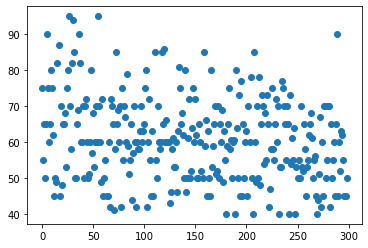

In [26]:
plt.plot(data.age,'o')
plt.show()

Tipos de datos

In [16]:
pd.unique(data['age'])

array([75.   , 55.   , 65.   , 50.   , 90.   , 60.   , 80.   , 62.   ,
       45.   , 49.   , 82.   , 87.   , 70.   , 48.   , 68.   , 53.   ,
       95.   , 58.   , 94.   , 85.   , 69.   , 72.   , 51.   , 57.   ,
       42.   , 41.   , 67.   , 79.   , 59.   , 44.   , 63.   , 86.   ,
       66.   , 43.   , 46.   , 61.   , 81.   , 52.   , 64.   , 40.   ,
       60.667, 73.   , 77.   , 78.   , 54.   , 47.   , 56.   ])

Medidas de dispersión de los datos

In [17]:
data['age'].describe()

count    299.000000
mean      60.833893
std       11.894809
min       40.000000
25%       51.000000
50%       60.000000
75%       70.000000
max       95.000000
Name: age, dtype: float64

Promedio de los datos

In [19]:
data['age'].mean()

60.83389297658862

Mediana de los datos

In [23]:
data['age'].med()

60.0

Desviación estandar de los datos

In [20]:
data['age'].std()

11.894809074044478

Rango de los datos

In [21]:
Ran=data['age'].max()-data['age'].min()
print(Ran)

55.0


Conclusión de datos estadísticos descriptivos.

El promedio de edades son 61 años

El rango de las edades de los pacienttes son 55

La mediana de los datos son 60

La desviación estandar de las edades es equivalente a 11.894

In [24]:
type(data.anaemia)

pandas.core.series.Series

Anemia en pacientes

In [25]:
data.anaemia

0      0
1      0
2      0
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: anaemia, Length: 299, dtype: int64

Representación gráfica de los datos 

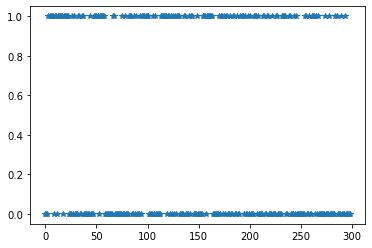

In [28]:
plt.plot(data.anaemia,'*')
plt.show()

Tipos de datos

In [29]:
pd.unique(data['anaemia'])

array([0, 1], dtype=int64)

Medidas de dispersión de los datos

In [31]:
data['anaemia'].describe()

count    299.000000
mean       0.431438
std        0.496107
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: anaemia, dtype: float64

Promedio de los datos

In [32]:
data['anaemia'].mean()

0.431438127090301

Mediana de los datos

In [35]:
data['anaemia'].median()

0.0

Desviación estandar de los datos

In [37]:
data['anaemia'].std()

0.49610726813307915

Rango de los datos

In [40]:
Ran2=data['anaemia'].max()-data['anaemia'].min()
print(Ran2)

1


Conclusión de datos estadísticos descriptivos.

La minoria de las pacientes tienen anemia esto se debe a que el valor de la media se aproxima más a 0 que a 1.

In [41]:
type(data.creatinine_phosphokinase)

pandas.core.series.Series

Creatina de los Pacientes

In [42]:
data.creatinine_phosphokinase

0       582
1      7861
2       146
3       111
4       160
       ... 
294      61
295    1820
296    2060
297    2413
298     196
Name: creatinine_phosphokinase, Length: 299, dtype: int64

Representación gráfica de la creatina.

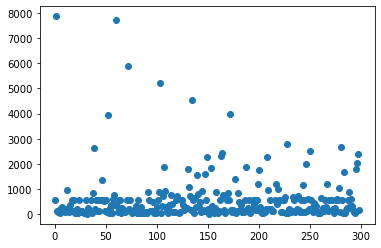

In [43]:
plt.plot(data.creatinine_phosphokinase,'o')
plt.show()

Tipos de datos

In [44]:
pd.unique(data['creatinine_phosphokinase'])

array([ 582, 7861,  146,  111,  160,   47,  246,  315,  157,  123,   81,
        231,  981,  168,   80,  379,  149,  125,   52,  128,  220,   63,
        148,  112,  122,   60,   70,   23,  249,  159,   94,  855, 2656,
        235,  124,  571,  127,  588, 1380,  553,  129,  577,   91, 3964,
         69,  260,  371,   75,  607,  789,  364, 7702,  318,  109,   68,
        250,  110,  161,  113, 5882,  224,   92,  102,  203,  336,   76,
         55,  280,   78,   84,  115,   66,  897,  154,  144,  133,  514,
         59,  156,   61,  305,  898, 5209,   53,  328,  748, 1876,  936,
        292,  369,  143,  754,  400,   96,  737,  358,  200,  248,  270,
       1808, 1082,  719,  193, 4540,  646,  281, 1548,  805,  291,  482,
        943,  185,  132, 1610, 2261,  233,   30, 1846,  335,   58,  910,
         72,  130, 2334, 2442,  776,  196,  835, 3966,  171,  198,   95,
       1419,  478,  176,  395,   99,  145,  104, 1896,  151,  244,   62,
        121,  418,  167, 1211, 1767,  308,   97,   

Medidas de dispersión de los datos

In [45]:
data['creatinine_phosphokinase'].describe()

count     299.000000
mean      581.839465
std       970.287881
min        23.000000
25%       116.500000
50%       250.000000
75%       582.000000
max      7861.000000
Name: creatinine_phosphokinase, dtype: float64

Promedio de los datos

In [46]:
data['creatinine_phosphokinase'].mean()

581.8394648829432

Mediana de los datos

In [47]:
data['creatinine_phosphokinase'].median()

250.0

Desviación estandar de los datos

In [48]:
data['creatinine_phosphokinase'].std()

970.2878807124363

Rango de los datos

In [49]:
Ran3=data['creatinine_phosphokinase'].max()-data['creatinine_phosphokinase'].min()
print(RanConclusión de datos estadísticos descriptivos.3)

7838


Conclusión de datos estadísticos descriptivos.

El promedio de la cantidad de creatinina de los pacientes es de 581.82

El rango de la cantidad de creatinina de los pacientes es de 7838

La mediana de los datos es 250

La desviación estandar de la cantidad de creatinina de los pacientes es de 970.287

In [59]:
type(data.diabetes)

pandas.core.series.Series

Diabetes en pacientes

In [58]:
data.diabetes

0      0
1      0
2      0
3      0
4      1
      ..
294    1
295    0
296    1
297    0
298    0
Name: diabetes, Length: 299, dtype: int64

Representación gráfica de diabetes.

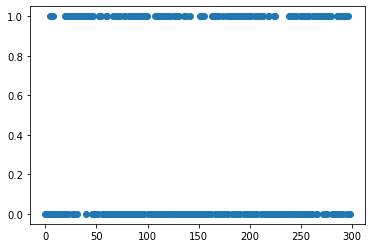

In [57]:
plt.plot(data.diabetes,'o')
plt.show()

Tipos de datos

In [56]:
pd.unique(data['diabetes'])

array([0, 1], dtype=int64)

Medidas de dispersión de los datos

In [55]:
data['diabetes'].describe()

count    299.000000
mean       0.418060
std        0.494067
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diabetes, dtype: float64

Promedio de los datos

In [54]:
data['diabetes'].mean()

0.4180602006688963

Mediana de los datos

In [53]:
data['diabetes'].median()

0.0

Desviación estandar de los datos

In [51]:
data['diabetes'].std()

0.49406706510360887

Rango de los datos

In [50]:
Ran=data['diabetes'].max()-data['diabetes'].min()
print(Ran)

1


Conclusión de datos estadísticos descriptivos.

La minoria de las pacientes tienen diabetes esto se debe a que el valor de la media se aproxima más a 0 que a 1.

In [24]:
type(data.ejection_fraction)

pandas.core.series.Series

Fracción de eyección en pacientes

In [67]:
data.ejection_fraction

0      20
1      38
2      20
3      20
4      20
       ..
294    38
295    38
296    60
297    38
298    45
Name: ejection_fraction, Length: 299, dtype: int64

Representación gráfica de los datos 

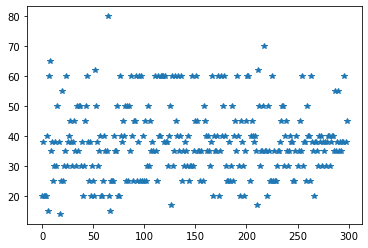

In [66]:
plt.plot(data.ejection_fraction,'*')
plt.show()

Tipos de datos

In [65]:
pd.unique(data['ejection_fraction'])

array([20, 38, 40, 15, 60, 65, 35, 25, 30, 50, 14, 55, 45, 62, 80, 17, 70],
      dtype=int64)

Medidas de dispersión de los datos

In [64]:
data['ejection_fraction'].describe()

count    299.000000
mean      38.083612
std       11.834841
min       14.000000
25%       30.000000
50%       38.000000
75%       45.000000
max       80.000000
Name: ejection_fraction, dtype: float64

Promedio de los datos

In [63]:
data['ejection_fraction'].mean()

38.08361204013378

Mediana de los datos

In [62]:
data['ejection_fraction'].median()

38.0

Desviación estandar de los datos

In [61]:
data['ejection_fraction'].std()

11.834840741039173

Rango de los datos

In [77]:
Ran2=data['ejection_fraction'].max()-data['ejection_fraction'].min()
print(Ran2)

66


Conclusión de datos estadísticos descriptivos.

El promedio de la cantidad de fracción de eyección de los pacientes es de 38.08

El rango de la cantidad de fracción de eyección de los pacientes es de 66

La mediana de los datos es 38

La desviación estandar de la cantidad de fracción de eyección de los pacientes es de 11.834

In [76]:
type(data.high_blood_pressure)

pandas.core.series.Series

Alta presión de los Pacientes

In [75]:
data.high_blood_pressure

0      1
1      0
2      0
3      0
4      0
      ..
294    1
295    0
296    0
297    0
298    0
Name: high_blood_pressure, Length: 299, dtype: int64

Representación gráfica de la alta presión en los pacientes.

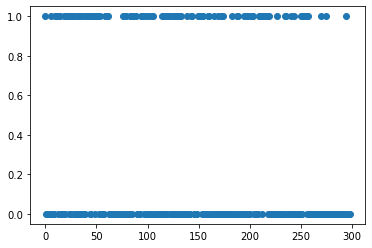

In [74]:
plt.plot(data.high_blood_pressure,'o')
plt.show()

Tipos de datos

In [73]:
pd.unique(data['high_blood_pressure'])

array([1, 0], dtype=int64)

Medidas de dispersión de los datos

In [72]:
data['high_blood_pressure'].describe()

count    299.000000
mean       0.351171
std        0.478136
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: high_blood_pressure, dtype: float64

Promedio de los datos

In [71]:
data['high_blood_pressure'].mean()

0.3511705685618729

Mediana de los datos

In [70]:
data['high_blood_pressure'].median()

0.0

Desviación estandar de los datos

In [69]:
data['high_blood_pressure'].std()

0.4781363790627452

Rango de los datos

In [68]:
Ran3=data['high_blood_pressure'].max()-data['high_blood_pressure'].min()
print(Ran3)

1


Conclusión de datos estadísticos descriptivos.

La minoria de las pacientes tienen hipertensión esto se debe a que el valor de la media se aproxima más a 0 que a 1.

In [78]:
type(data.platelets)

pandas.core.series.Series

Platelets de pacientes

In [79]:
data.platelets

0      265000.00
1      263358.03
2      162000.00
3      210000.00
4      327000.00
         ...    
294    155000.00
295    270000.00
296    742000.00
297    140000.00
298    395000.00
Name: platelets, Length: 299, dtype: float64

Representación gráfica de plaquetas.

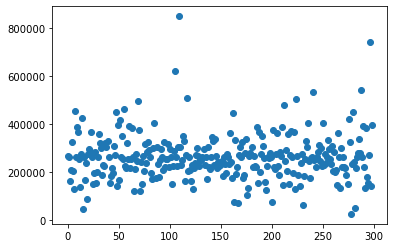

In [80]:
plt.plot(data.platelets,'o')
plt.show()

Tipos de datos

In [81]:
pd.unique(data['platelets'])

array([265000.  , 263358.03, 162000.  , 210000.  , 327000.  , 204000.  ,
       127000.  , 454000.  , 388000.  , 368000.  , 253000.  , 136000.  ,
       276000.  , 427000.  ,  47000.  , 262000.  , 166000.  , 237000.  ,
        87000.  , 297000.  , 289000.  , 149000.  , 196000.  , 284000.  ,
       153000.  , 200000.  , 360000.  , 319000.  , 302000.  , 188000.  ,
       228000.  , 226000.  , 321000.  , 305000.  , 329000.  , 185000.  ,
       218000.  , 194000.  , 310000.  , 271000.  , 451000.  , 140000.  ,
       395000.  , 418000.  , 351000.  , 255000.  , 461000.  , 223000.  ,
       216000.  , 254000.  , 390000.  , 385000.  , 119000.  , 213000.  ,
       274000.  , 244000.  , 497000.  , 374000.  , 122000.  , 243000.  ,
       266000.  , 317000.  , 283000.  , 324000.  , 293000.  , 172000.  ,
       406000.  , 173000.  , 304000.  , 235000.  , 181000.  , 249000.  ,
       219000.  , 318000.  , 221000.  , 298000.  , 286000.  , 621000.  ,
       263000.  , 850000.  , 306000.  , 252000.  , 

Medidas de dispersión de los datos

In [82]:
data['platelets'].describe()

count       299.000000
mean     263358.029264
std       97804.236869
min       25100.000000
25%      212500.000000
50%      262000.000000
75%      303500.000000
max      850000.000000
Name: platelets, dtype: float64

Promedio de los datos

In [83]:
data['platelets'].mean()

263358.02926421416

Mediana de los datos

In [85]:
data['platelets'].median()

262000.0

Desviación estandar de los datos

In [86]:
data['platelets'].std()

97804.23686859828

Rango de los datos

In [87]:
Ran=data['platelets'].max()-data['platelets'].min()
print(Ran)

824900.0


Conclusión de datos estadísticos descriptivos.

El promedio de la cantidad de plaquetas de los pacientes es de 263358.0292

El rango de la cantidad de plaquetas de los pacientes es de 824900

La mediana de los datos es 262000

La desviación estandar de la cantidad de plaquetas de los pacientes es de 97804.236

In [88]:
type(data.serum_creatinine)

pandas.core.series.Series

Suero de creatina en pacientes

In [89]:
data.serum_creatinine

0      1.9
1      1.1
2      1.3
3      1.9
4      2.7
      ... 
294    1.1
295    1.2
296    0.8
297    1.4
298    1.6
Name: serum_creatinine, Length: 299, dtype: float64

Representación gráfica de los datos 

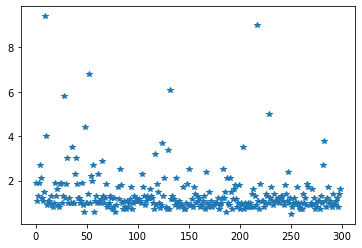

In [90]:
plt.plot(data.serum_creatinine,'*')
plt.show()

Tipos de datos

In [91]:
pd.unique(data['serum_creatinine'])

array([1.9 , 1.1 , 1.3 , 2.7 , 2.1 , 1.2 , 1.5 , 9.4 , 4.  , 0.9 , 1.  ,
       0.8 , 1.6 , 1.83, 5.8 , 3.  , 3.5 , 2.3 , 0.6 , 4.4 , 1.4 , 6.8 ,
       2.2 , 2.  , 1.18, 2.9 , 0.7 , 1.7 , 2.5 , 1.8 , 3.2 , 0.75, 3.7 ,
       3.4 , 6.1 , 2.4 , 9.  , 5.  , 0.5 , 3.8 ])

Medidas de dispersión de los datos

In [92]:
data['serum_creatinine'].describe()

count    299.00000
mean       1.39388
std        1.03451
min        0.50000
25%        0.90000
50%        1.10000
75%        1.40000
max        9.40000
Name: serum_creatinine, dtype: float64

Promedio de los datos

In [93]:
data['serum_creatinine'].mean()

1.393879598662207

Mediana de los datos

In [94]:
data['serum_creatinine'].median()

1.1

Desviación estandar de los datos

In [95]:
data['serum_creatinine'].std()

1.034510064089853

Rango de los datos

In [96]:
Ran2=data['serum_creatinine'].max()-data['serum_creatinine'].min()
print(Ran2)

8.9


Conclusión de datos estadísticos descriptivos.

El promedio de la cantidad de suero de creatina de los pacientes es de 1.3938

El rango de la cantidad de suero de creatina de los pacientes es de 8.9

La mediana de los datos es 1.1

La desviación estandar de la cantidad de suero de creatina de los pacientes es de 1.0345

In [97]:
type(data.serum_sodium)

pandas.core.series.Series

Suero de sodio de los Pacientes

In [98]:
data.serum_sodium

0      130
1      136
2      129
3      137
4      116
      ... 
294    143
295    139
296    138
297    140
298    136
Name: serum_sodium, Length: 299, dtype: int64

Representación gráfica del sodio en pacientes.

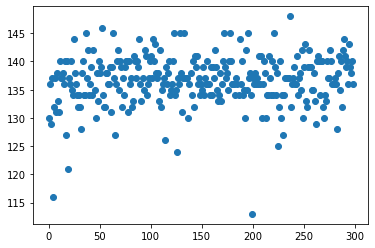

In [99]:
plt.plot(data.serum_sodium,'o')
plt.show()

Tipos de datos

In [100]:
pd.unique(data['serum_sodium'])

array([130, 136, 129, 137, 116, 132, 131, 138, 133, 140, 127, 121, 135,
       134, 144, 128, 145, 142, 139, 146, 141, 143, 126, 124, 113, 125,
       148], dtype=int64)

Medidas de dispersión de los datos

In [101]:
data['serum_sodium'].describe()

count    299.000000
mean     136.625418
std        4.412477
min      113.000000
25%      134.000000
50%      137.000000
75%      140.000000
max      148.000000
Name: serum_sodium, dtype: float64

Promedio de los datos

In [102]:
data['serum_sodium'].mean()

136.62541806020067

Mediana de los datos

In [103]:
data['serum_sodium'].median()

137.0

Desviación estandar de los datos

In [104]:
data['serum_sodium'].std()

4.412477283909233

Rango de los datos

In [105]:
Ran3=data['serum_sodium'].max()-data['serum_sodium'].min()
print(Ran3)

35


Conclusión de datos estadísticos descriptivos.

El promedio de la cantidad de suero de sodio de los pacientes es de 136.625

El rango de la cantidad de suero de sodio de los pacientes es de 35

La mediana de los datos es 137

La desviación estandar de la cantidad de suero de sodio de los pacientes es de 4.4124

In [106]:
type(data.sex)

pandas.core.series.Series

Sexo de pacientes

In [107]:
data.sex

0      1
1      1
2      1
3      1
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: sex, Length: 299, dtype: int64

Representación gráfica de sexos de pacientes.

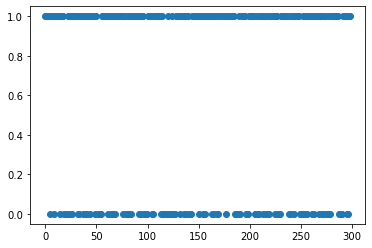

In [108]:
plt.plot(data.sex,'o')
plt.show()

Tipos de datos

In [109]:
pd.unique(data['sex'])

array([1, 0], dtype=int64)

Medidas de dispersión de los datos

In [110]:
data['sex'].describe()

count    299.000000
mean       0.648829
std        0.478136
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: sex, dtype: float64

Promedio de los datos

In [111]:
data['sex'].mean()

0.6488294314381271

Mediana de los datos

In [113]:
data['sex'].median()

1.0

Desviación estandar de los datos

In [114]:
data['sex'].std()

0.47813637906274487

Rango de los datos

In [115]:
Ran=data['sex'].max()-data['sex'].min()
print(Ran)

1


Conclusión de datos estadísticos descriptivos.

La mayoría de las pacientes son hombres esto se debe a que el valor de la media se aproxima más a 0 que a 1.

In [120]:
type(data.smoking)

pandas.core.series.Series

Pacientes que fuman

In [116]:
data.smoking

0      0
1      0
2      1
3      0
4      0
      ..
294    1
295    0
296    0
297    1
298    1
Name: smoking, Length: 299, dtype: int64

Representación gráfica de los datos 

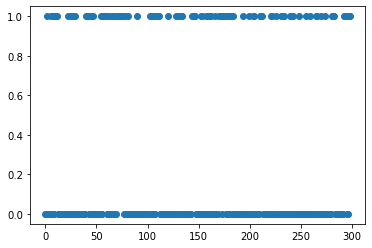

In [118]:
plt.plot(data.smoking,'o')
plt.show()

Tipos de datos

In [119]:
pd.unique(data['smoking'])

array([0, 1], dtype=int64)

Medidas de dispersión de los datos

In [121]:
data['smoking'].describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: smoking, dtype: float64

Promedio de los datos

In [122]:
data['smoking'].mean()

0.3210702341137124

Mediana de los datos

In [123]:
data['smoking'].median()

0.0

Desviación estandar de los datos

In [124]:
data['smoking'].std()

0.4676704280567721

Rango de los datos

In [125]:
Ran2=data['smoking'].max()-data['smoking'].min()
print(Ran2)

1


Conclusión de datos estadísticos descriptivos.

La minoría de los pacientes fuman esto se debe a que el valor de la media se aproxima más a 0 que a 1.

In [126]:
type(data.time)

pandas.core.series.Series

Tiempo de seguimiento de los pacientes

In [127]:
data.time

0        4
1        6
2        7
3        7
4        8
      ... 
294    270
295    271
296    278
297    280
298    285
Name: time, Length: 299, dtype: int64

Representación gráfica de el tiempo de seguimiento de los pacientes.

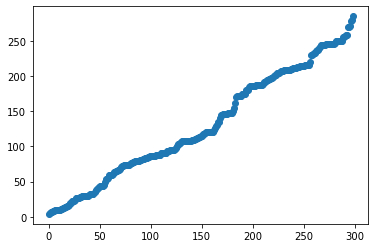

In [128]:
plt.plot(data.time,'o')
plt.show()

Tipos de datos

In [129]:
pd.unique(data['time'])

array([  4,   6,   7,   8,  10,  11,  12,  13,  14,  15,  16,  20,  22,
        23,  24,  26,  27,  28,  29,  30,  31,  32,  33,  35,  38,  40,
        41,  42,  43,  44,  45,  50,  54,  55,  59,  60,  61,  63,  64,
        65,  66,  67,  68,  71,  72,  73,  74,  75,  76,  77,  78,  79,
        80,  82,  83,  85,  86,  87,  88,  90,  91,  94,  95,  96,  97,
       100, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 117,
       118, 119, 120, 121, 123, 126, 129, 130, 134, 135, 140, 145, 146,
       147, 148, 150, 154, 162, 170, 171, 172, 174, 175, 180, 185, 186,
       187, 188, 192, 193, 194, 195, 196, 197, 198, 200, 201, 205, 206,
       207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 220, 230, 231,
       233, 235, 237, 240, 241, 244, 245, 246, 247, 250, 256, 257, 258,
       270, 271, 278, 280, 285], dtype=int64)

Medidas de dispersión de los datos

In [130]:
data['time'].describe()

count    299.000000
mean     130.260870
std       77.614208
min        4.000000
25%       73.000000
50%      115.000000
75%      203.000000
max      285.000000
Name: time, dtype: float64

Promedio de los datos

In [131]:
data['time'].mean()

130.2608695652174

Mediana de los datos

In [132]:
data['time'].median()

115.0

Desviación estandar de los datos

In [133]:
data['time'].std()

77.61420795029342

Rango de los datos

In [134]:
Ran3=data['time'].max()-data['time'].min()
print(Ran3)

281


Conclusión de datos estadísticos descriptivos.

El promedio de la cantidad de tiempo de seguimiento de los pacientes es de 130.260

El rango de la cantidad de tiempo de seguimiento  de los pacientes es de 281

La mediana de los datos es 115

La desviación estandar de la cantidad de tiempo de seguimiento  de los pacientes es de 77.6142

In [135]:
type(data.DEATH_EVENT)

pandas.core.series.Series

Muertes de los pacientes

In [136]:
data.DEATH_EVENT

0      1
1      1
2      1
3      1
4      1
      ..
294    0
295    0
296    0
297    0
298    0
Name: DEATH_EVENT, Length: 299, dtype: int64

Representación gráfica de muerte de los pacientes.

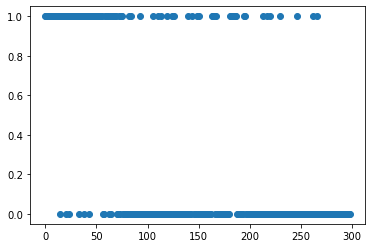

In [138]:
plt.plot(data.DEATH_EVENT,'o')
plt.show()

Tipos de datos

In [139]:
pd.unique(data['DEATH_EVENT'])

array([1, 0], dtype=int64)

Medidas de dispersión de los datos

In [140]:
data['DEATH_EVENT'].describe()

count    299.00000
mean       0.32107
std        0.46767
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        1.00000
Name: DEATH_EVENT, dtype: float64

Promedio de los datos

In [141]:
data['DEATH_EVENT'].mean()

0.3210702341137124

Mediana de los datos

In [143]:
data['DEATH_EVENT'].median()

0.0

Desviación estandar de los datos

In [144]:
data['DEATH_EVENT'].std()

0.4676704280567721

Rango de los datos

In [145]:
Ran=data['DEATH_EVENT'].max()-data['DEATH_EVENT'].min()
print(Ran)

1


Conclusión de datos estadísticos descriptivos.

La minoría de los pacientes ham fallecido se debe a que el valor de la media se aproxima más a 0 que a 1.

# Comparación de datos de edades contra suero de sodio

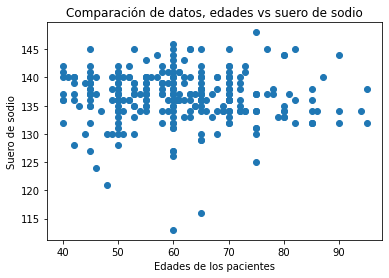

In [149]:
plt.plot(data.age,data.serum_sodium,'o')
plt.title("Comparación de datos, edades vs suero de sodio")
plt.xlabel("Edades de los pacientes")
plt.ylabel("Suero de sodio")
plt.show()

Conclusión de gráfica

Se puede inferir a partir de la gráfica que no hay una correlación directa mayor entre la edad de los pacientes y la camtidad de suero de sodio que producen sus cuerpos